In [10]:

# import os
# import tensorflow as tf

# from utils.data_loader import load_and_prepare_data
# from utils.model_utils import get_model
# from models.training.trainer import train_model
# from models.training.evaluate import evaluate_model, plot_history



# # List of models to iterate through
# model_types = ["lenet", "alexnet", "vgg", "resnet", "googlenet", "mobilenet"]

# # Define dataset directory (adjust if needed)
# data_path = "dataset"

# # Initialize empty results dictionary for each model
# results = {}




# # Iterate over each model type
# for model_type in model_types:

#     # Load and preprocess the data for the current model
#     X_train, X_test, y_gender_train, y_gender_test, y_hand_train, y_hand_test, y_finger_train, y_finger_test = load_and_prepare_data(
#         model_type, data_path
#     )
    
#     # Combine labels for training and testing
#     y_train = [y_gender_train, y_hand_train, y_finger_train]
#     y_test = [y_gender_test, y_hand_test, y_finger_test]

#     # Get the input shape for the current model
#     input_shape = get_input_shape(model_type)

#     # Load the corresponding model
#     print(f"\nProcessing model: {model_type}")
#     model = get_model(model_type, input_shape)

#     # Print model summary (optional)
#     model.summary()

#     # Training parameters
#     batch_size = 32
#     epochs = 20
#     model_save_dir = "saved_models"

#     # Train model
#     print(f"Training {model_type} model...")
#     model, history = train_model(
#         model, X_train, y_train, X_test, y_test,
#         model_name=model_type,
#         batch_size=batch_size,
#         epochs=epochs,
#         model_save_dir=model_save_dir
#     )
    
#     # Evaluate the model
#     print(f"Evaluating {model_type} model...")
#     model_results = evaluate_model(model, X_test, y_test)
    
#     # Store the results
#     results[model_type] = {
#         "model": model,
#         "history": history,
#         "evaluation_results": model_results
#     }

#     # Optionally, plot accuracy and loss for each model
#     plot_history(history)



In [11]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Import necessary libraries
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from utils.new_preprocess_and_loader import load_and_prepare_data, get_model, train_model, evaluate_model, plot_history


In [13]:
data_path = 'dataset'  # Path to your dataset

# List of models to train: 'resnet', 'vgg', 'mobilenet'
model_types = ['mobilenet', 'vgg', 'resnet']

In [14]:
print(f"\nLoading and preparing data...")
# Step 1: Load and prepare the data
X_train, X_test, y_gender_train, y_gender_test, y_hand_train, y_hand_test, y_finger_train, y_finger_test = load_and_prepare_data(model_type, data_path)



Loading and preparing data...
[DEBUG] Target shape for model 'mobilenet': (224, 224, 3)
[INFO] Processed 0/100 images
[INFO] Processed 20/100 images
[INFO] Processed 40/100 images
[INFO] Processed 60/100 images
[INFO] Processed 80/100 images
[INFO] Finished processing images. Total processed: 100
INFO] Converting data to numpy arrays...
[INFO] One-hot encoding labels...



Fetching mobilenet model...
Building MobileNetV2 model with input shape: (224, 224, 3)

Defining callbacks...

Training mobilenet model...
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - finger_output_accuracy: 0.3583 - finger_output_loss: 1.7889 - gender_output_accuracy: 0.6604 - gender_output_loss: 0.6621 - hand_output_accuracy: 0.5146 - hand_output_loss: 0.9552 - loss: 3.4066

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - finger_output_accuracy: 0.3500 - finger_output_loss: 1.7974 - gender_output_accuracy: 0.6703 - gender_output_loss: 0.6648 - hand_output_accuracy: 0.5141 - hand_output_loss: 0.9506 - loss: 3.4134 - val_finger_output_accuracy: 0.1500 - val_finger_output_loss: 1.9081 - val_gender_output_accuracy: 0.7500 - val_gender_output_loss: 0.7502 - val_hand_output_accuracy: 0.4000 - val_hand_output_loss: 0.8758 - val_loss: 3.5341
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - finger_output_accuracy: 0.1906 - finger_output_loss: 1.8391 - gender_output_accuracy: 0.7406 - gender_output_loss: 0.7121 - hand_output_accuracy: 0.4208 - hand_output_loss: 0.7942 - loss: 3.3653

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 678ms/step - finger_output_accuracy: 0.1961 - finger_output_loss: 1.8375 - gender_output_accuracy: 0.7398 - gender_output_loss: 0.6926 - hand_output_accuracy: 0.4281 - hand_output_loss: 0.7915 - loss: 3.3514 - val_finger_output_accuracy: 0.1000 - val_finger_output_loss: 1.9460 - val_gender_output_accuracy: 0.8000 - val_gender_output_loss: 0.6711 - val_hand_output_accuracy: 0.4500 - val_hand_output_loss: 0.8399 - val_loss: 3.4570
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 679ms/step - finger_output_accuracy: 0.2539 - finger_output_loss: 1.6442 - gender_output_accuracy: 0.7578 - gender_output_loss: 0.5828 - hand_output_accuracy: 0.5305 - hand_output_loss: 0.7631 - loss: 3.0022 - val_finger_output_accuracy: 0.1000 - val_finger_output_loss: 1.8447 - val_gender_output_accuracy: 0.7500 - val_gender_output_loss: 0.6419 - val_hand_output_accuracy: 0.4500 - val_hand_output_loss: 0.7689 - val_loss: 3.2555
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - finger_output_a

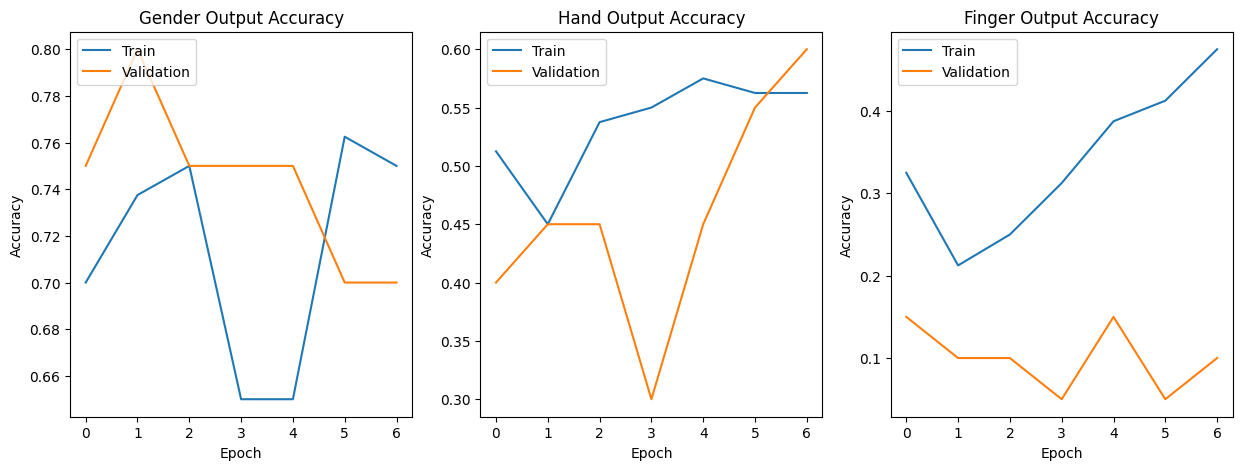

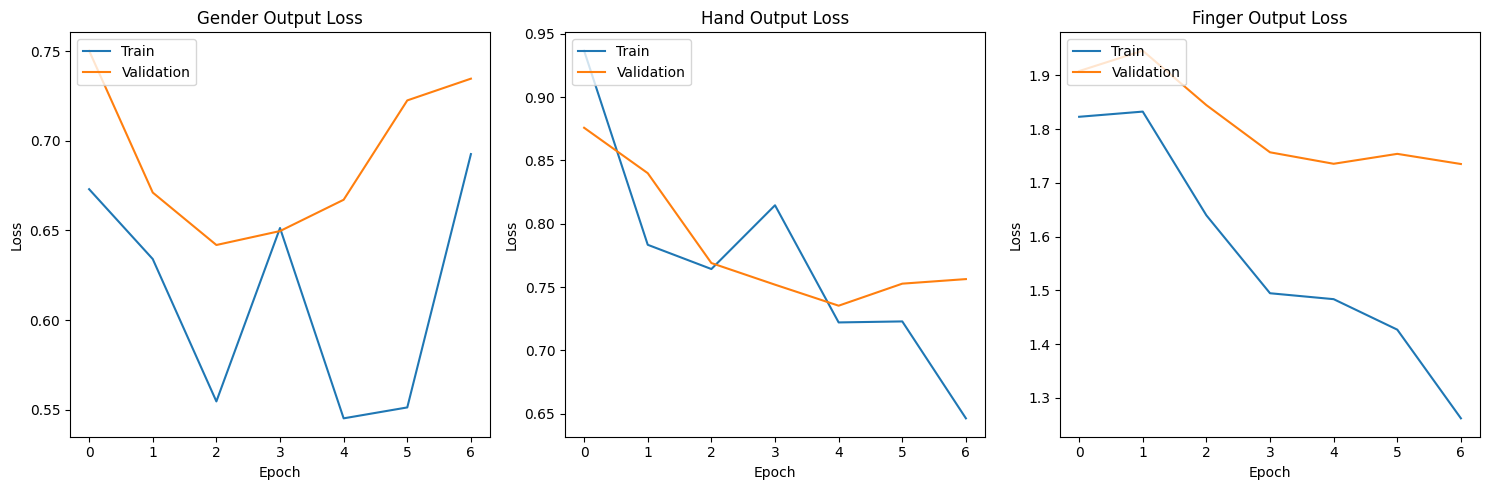


Results for mobilenet: [3.457024335861206, 0.6711450815200806, 0.8398972749710083, 1.9459823369979858, 0.10000000149011612, 0.800000011920929, 0.44999998807907104]

Fetching vgg model...
Building VGG16 model with input shape: (224, 224, 3)

Defining callbacks...

Training vgg model...
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - finger_output_accuracy: 0.2375 - finger_output_loss: 3.8784 - gender_output_accuracy: 0.5448 - gender_output_loss: 2.6389 - hand_output_accuracy: 0.5385 - hand_output_loss: 1.8577 - loss: 8.2379  

3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 12s/step - finger_output_accuracy: 0.2313 - finger_output_loss: 4.1416 - gender_output_accuracy: 0.5711 - gender_output_loss: 2.7679 - hand_output_accuracy: 0.5383 - hand_output_loss: 2.2026 - loss: 8.9066 - val_finger_output_accuracy: 0.2500 - val_finger_output_loss: 2.5187 - val_gender_output_accuracy: 0.7500 - val_gender_output_loss: 5.6098 - val_hand_output_accuracy: 0.4500 - val_hand_output_loss: 2.4324 - val_loss: 10.5609
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 9s/step - finger_output_accuracy: 0.3266 - finger_output_loss: 3.0073 - gender_output_accuracy: 0.8031 - gender_output_loss: 2.2559 - hand_output_accuracy: 0.4961 - hand_output_loss: 2.9971 - loss: 8.2178 - val_finger_output_accuracy: 0.1500 - val_finger_output_loss: 2.3344 - val_gender_output_accuracy: 0.3000 - val_gender_output_loss: 1.8522 - val_hand_output_accuracy: 0.5500 - val_hand_output_loss: 2.0919 - val_loss: 6.2786
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - finger_output_accur

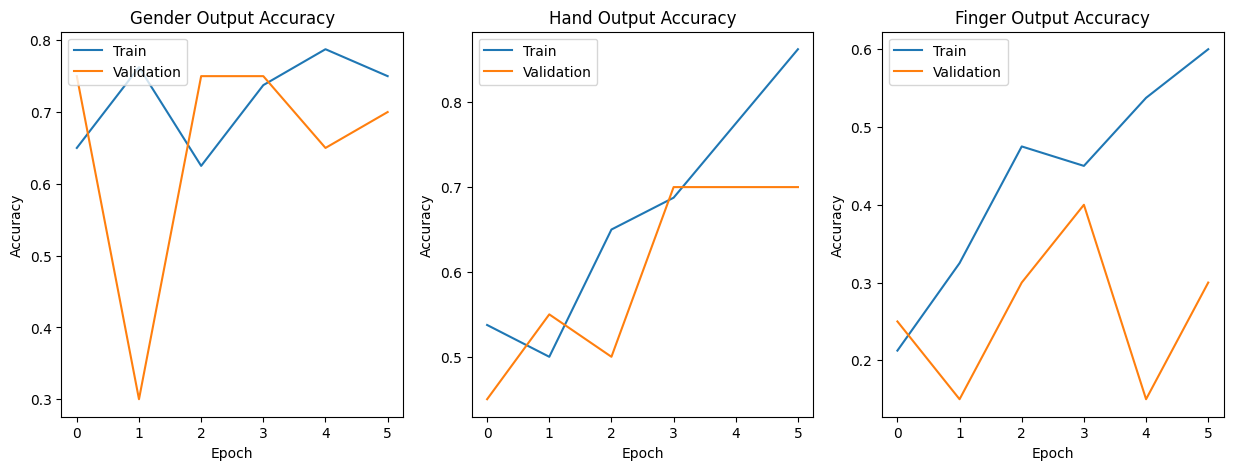

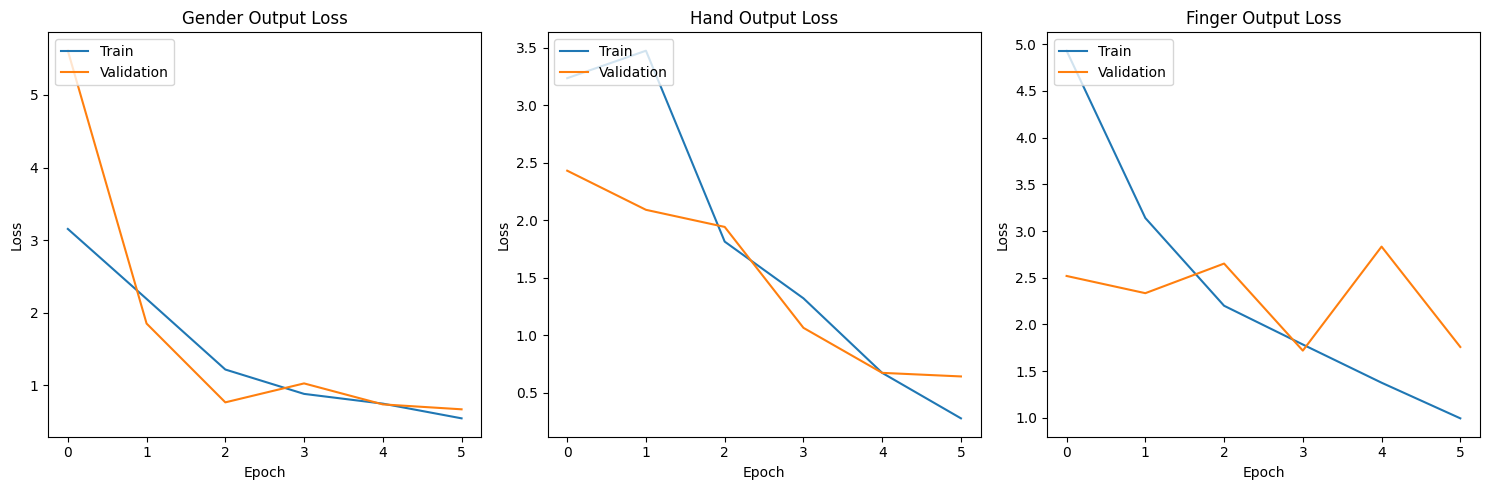


Results for vgg: [10.560883522033691, 5.6097588539123535, 2.4324228763580322, 2.5187015533447266, 0.25, 0.75, 0.44999998807907104]

Fetching resnet model...
Building ResNet50 model with input shape: (224, 224, 3)

Defining callbacks...

Training resnet model...
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - finger_output_accuracy: 0.1771 - finger_output_loss: 3.7867 - gender_output_accuracy: 0.6094 - gender_output_loss: 1.8237 - hand_output_accuracy: 0.4802 - hand_output_loss: 1.1466 - loss: 6.7062 

3/3 ━━━━━━━━━━━━━━━━━━━━ 62s 12s/step - finger_output_accuracy: 0.1797 - finger_output_loss: 4.0049 - gender_output_accuracy: 0.6133 - gender_output_loss: 1.8856 - hand_output_accuracy: 0.4820 - hand_output_loss: 1.2049 - loss: 7.0193 - val_finger_output_accuracy: 0.1000 - val_finger_output_loss: 2.6214 - val_gender_output_accuracy: 0.7500 - val_gender_output_loss: 0.9862 - val_hand_output_accuracy: 0.4500 - val_hand_output_loss: 1.2404 - val_loss: 4.8481
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 11s/step - finger_output_accuracy: 0.2336 - finger_output_loss: 2.7792 - gender_output_accuracy: 0.7953 - gender_output_loss: 0.7082 - hand_output_accuracy: 0.5844 - hand_output_loss: 0.8812 - loss: 4.4183 - val_finger_output_accuracy: 0.1000 - val_finger_output_loss: 11.4440 - val_gender_output_accuracy: 0.7500 - val_gender_output_loss: 12.5659 - val_hand_output_accuracy: 0.4500 - val_hand_output_loss: 5.2479 - val_loss: 29.2578
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 9s/step - finger_output_ac

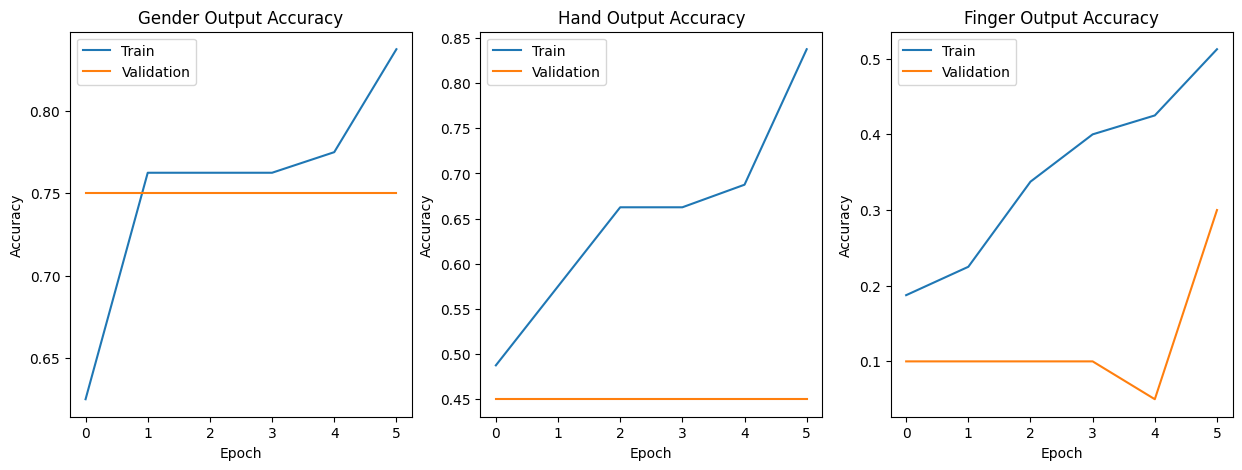

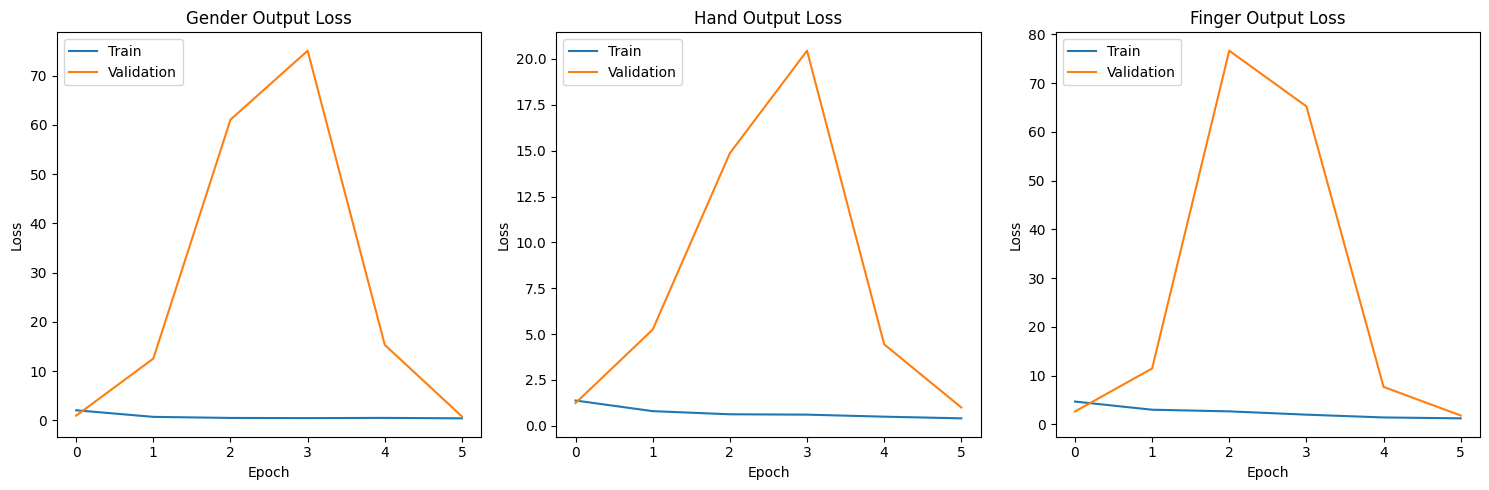


Results for resnet: [4.848076820373535, 0.9862200021743774, 1.2404329776763916, 2.6214237213134766, 0.10000000149011612, 0.75, 0.44999998807907104]


In [15]:
# Iterate over each model type and run the pipeline
for model_type in model_types:
    # Step 2: Get the model (ResNet, VGG, MobileNet)
    input_shape = X_train.shape[1:]  # Extract input shape from the data
    print(f"\nFetching {model_type} model...")
    model = get_model(model_type, input_shape)

    # Step 3: Train the model
    model_save_dir = f"saved_models/{model_type}"
    os.makedirs(model_save_dir, exist_ok=True)

    # Define callbacks for early stopping and model checkpointing
    print("\nDefining callbacks...")
    callbacks = [
        EarlyStopping(
            monitor='val_gender_output_accuracy',
            patience=5,
            restore_best_weights=True,
            mode='max'  # <-- This tells Keras to look for highest accuracy
        ),
        ModelCheckpoint(
            os.path.join(model_save_dir, f"{model}_best.h5"),
            monitor='val_gender_output_accuracy',
            save_best_only=True,
            mode='max'  # <-- Also helpful here
        )
    ]


    model.compile(
    optimizer='adam',
    loss={
        "gender_output": "categorical_crossentropy",
        "hand_output": "categorical_crossentropy",
        "finger_output": "categorical_crossentropy"
    },
    metrics={
        "gender_output": "accuracy",
        "hand_output": "accuracy",
        "finger_output": "accuracy"
    }
)

    # Train model
    print(f"\nTraining {model_type} model...")
    history = model.fit(
        X_train,
        {
            "gender_output": y_gender_train,
            "hand_output": y_hand_train,
            "finger_output": y_finger_train
        },
        validation_data=(X_test, {
            "gender_output": y_gender_test,
            "hand_output": y_hand_test,
            "finger_output": y_finger_test
        }),
        batch_size=32,
        epochs=20,
        callbacks=callbacks,
        verbose=1
    )

    # Step 4: Evaluate the model
    print(f"\nEvaluating {model_type} model...")
    results = evaluate_model(model, X_test, (y_gender_test, y_hand_test, y_finger_test))
    
    # Step 5: Plot training history
    print("\nPlotting training history...")
    plot_history(history)
    
    print(f"\nResults for {model_type}: {results}")
    print("="*50)
